<a href="https://colab.research.google.com/github/Rishabhjain2003/Sales-Analysis/blob/main/Sales_Analysis_pyotrch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

data = pd.read_csv('/content/Stores.csv')
print(data.head())

   Store_ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1        1659             1961                   530        66490
1          2        1461             1752                   210        39820
2          3        1340             1609                   720        54010
3          4        1451             1748                   620        53730
4          5        1770             2111                   450        46620


In [16]:
data = data.iloc[:, 1:]

x = data.drop(columns=['Store_Sales'])
y = data['Store_Sales']

print(x)
print(y)

     Store_Area  Items_Available  Daily_Customer_Count
0          1659             1961                   530
1          1461             1752                   210
2          1340             1609                   720
3          1451             1748                   620
4          1770             2111                   450
..          ...              ...                   ...
891        1582             1910                  1080
892        1387             1663                   850
893        1200             1436                  1060
894        1299             1560                   770
895        1174             1429                  1110

[896 rows x 3 columns]
0      66490
1      39820
2      54010
3      53730
4      46620
       ...  
891    66390
892    82080
893    76440
894    96610
895    54340
Name: Store_Sales, Length: 896, dtype: int64


In [17]:
print(y.dtype)

int64


In [20]:
print(x['Store_Area'].dtype)
print(x['Items_Available'].dtype)
print(x['Daily_Customer_Count'].dtype)

int64
int64
int64


In [22]:
X = torch.tensor(x.values, dtype=torch.float64)
print(X)

tensor([[1659., 1961.,  530.],
        [1461., 1752.,  210.],
        [1340., 1609.,  720.],
        ...,
        [1200., 1436., 1060.],
        [1299., 1560.,  770.],
        [1174., 1429., 1110.]], dtype=torch.float64)


In [24]:
Y = torch.tensor(y.values, dtype=torch.float64)
print(Y)

tensor([ 66490.,  39820.,  54010.,  53730.,  46620.,  45260.,  72240.,  37720.,
         46310.,  44150.,  71280.,  57620.,  60470.,  59130.,  66360.,  78870.,
         77250.,  38170.,  63540.,  40190.,  43460.,  68890.,  52780.,  50680.,
         41880.,  70050.,  25820.,  60530.,  78100.,  84860.,  80140.,  14920.,
         60460.,  74560.,  72430.,  45460.,  41570.,  62870.,  55170.,  45480.,
         49550.,  48140.,  67640.,  39730.,  35800.,  49270.,  66510.,  62530.,
         59980.,  76350.,  81820.,  57830.,  70450.,  67000.,  64090.,  48670.,
         66210.,  83660.,  70770.,  53870.,  71300.,  46100.,  49100.,  65920.,
         58660.,  69130.,  49080.,  72710.,  33430.,  42430.,  56650.,  33580.,
         67370.,  71780.,  84840.,  82070.,  26770.,  65560.,  38660.,  65660.,
         40700.,  88910.,  57860.,  42670.,  90180.,  51280.,  97260.,  39650.,
         45720.,  42060.,  65350.,  67080.,  54030.,  56360.,  77120.,  50810.,
         60960.,  61180.,  63660.,  4119

In [25]:
n_samples, n_features = X.shape
print(n_samples, " ", n_features)

896   3


In [75]:
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size, dtype=torch.float64)

In [76]:
learning_rate = 0.0000001
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [77]:
num_epochs = 100
for epoch in range(num_epochs):
  y_pred = model(X)
  loss = criterion(y_pred, Y)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if(epoch+1)%10==0:
    print(f'epoch : {epoch+1}, loss : {loss.item():.4f}')

epoch : 10, loss : 375158309.7310
epoch : 20, loss : 373909587.1849
epoch : 30, loss : 373009774.3092
epoch : 40, loss : 372361380.2959
epoch : 50, loss : 371894154.7952
epoch : 60, loss : 371557476.5005
epoch : 70, loss : 371314868.4874
epoch : 80, loss : 371140046.0531
epoch : 90, loss : 371014068.8502
epoch : 100, loss : 370923288.7600


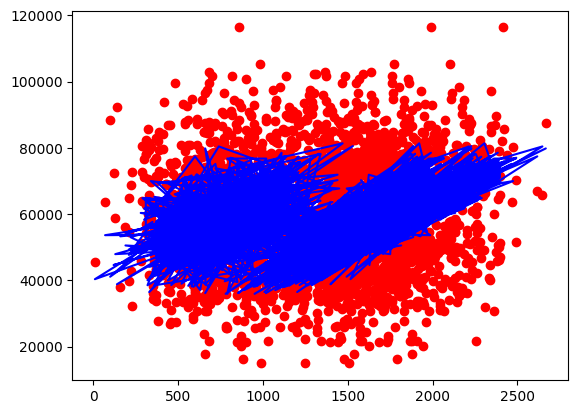

In [78]:
import matplotlib.pyplot as plt

predicted = model(X).detach().numpy()
plt.plot(x, y, 'ro')
plt.plot(x, predicted, 'b')
plt.show()

In [48]:
print(model(X))

tensor([[7405.3920],
        [6345.1994],
        [6310.8143],
        [6700.2092],
        [7839.6961],
        [6781.2191],
        [7463.3639],
        [6237.1857],
        [5249.6757],
        [5377.9689],
        [6040.0316],
        [8032.0923],
        [8247.7837],
        [7855.5602],
        [6881.5515],
        [7598.6828],
        [8006.8591],
        [7794.8753],
        [7019.9562],
        [9104.4942],
        [6314.5326],
        [6769.1819],
        [8122.2676],
        [6707.1882],
        [5989.7986],
        [8038.9234],
        [7244.1904],
        [6710.5320],
        [7505.4529],
        [7854.9136],
        [7020.5177],
        [6197.3751],
        [6443.9541],
        [8140.0782],
        [6727.5334],
        [8490.2907],
        [6669.4460],
        [5946.2053],
        [8671.0472],
        [5339.8899],
        [7204.3070],
        [4603.6340],
        [7693.9464],
        [8171.5288],
        [4689.2619],
        [5967.2607],
        [8001.8045],
        [7807